In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [11]:
import vtk

In [3]:
xhalf = 0.02/2
ymin = 0.01
ymax = 0.02
xcrack = 0.05
ycrack = 0.01
n = 16

In [4]:
xarea = np.array([0,0,0.1,0.1,0])
yarea = np.array([0,0.1,0.1,0,0])

In [5]:
xareaPD = np.array([0.04,0.04,0.06,0.06,0.04])
yareaPD = np.array([0.01,0.03,0.03,0.01,0.01])

In [6]:
h = xhalf/n
h

h = (xhalf-h/2) / n

In [25]:
x = []
y = []
volume = []
for j in range(0,int(2*ycrack/h)+1):
    for i in range(0,2*n+2):
        x.append(0.04+i*h)
        y.append(0.01+j*h)
        if i == 0 or i == 2*n+1 or j == 0 or j == int(2*ycrack/h) :
            volume.append(h*h/2)
        else:
            volume.append(h*h)
        
    

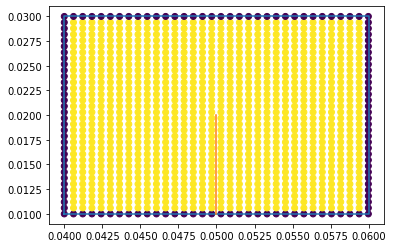

In [26]:
plt.plot(xareaPD,yareaPD)
plt.plot([0.05,0.05],[0.01,0.02])
plt.scatter(x,y,c=volume)

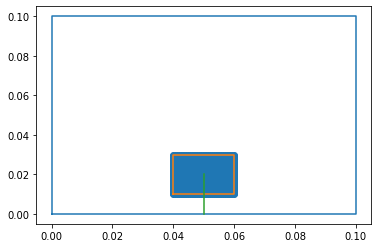

In [9]:
plt.plot(xarea,yarea)
plt.plot(xareaPD,yareaPD)
plt.plot([0.05,0.05],[0,0.02])
plt.scatter(x,y)

In [31]:
writer = vtk.vtkXMLUnstructuredGridWriter()
writer.SetFileName("coupling_"+str(n)+".vtu")
grid = vtk.vtkUnstructuredGrid()
points = vtk.vtkPoints()
points.SetNumberOfPoints(len(x))
points.SetDataTypeToDouble()
for i in range(0,len(x)):
     points.InsertPoint(i,x[i],y[i],0.)
grid.SetPoints(points)
dataOut = grid.GetPointData()
array = vtk.vtkDoubleArray()
array.SetName("Volumes")
array.SetNumberOfComponents(1)
array.SetNumberOfTuples(len(x))

for i in range(0,len(x)):
    array.SetTuple1(i,volume[i])
dataOut.AddArray(array)
writer.SetInputData(grid)
writer.GetCompressor().SetCompressionLevel(0)
writer.SetDataModeToAscii()
writer.Write()

1

In [32]:
%%bash 
ls

LICENSE
README.md
Untitled.ipynb
coupling_16.vtu
